In [1]:
import json
from urllib.request import urlopen
from PIL import Image, ImageDraw
import pandas as pd
import sqlite3
import numpy as np
import glob
import os

In [2]:
PIXELS_X = 910
PIXELS_Y = 910  # equal to the number of scan lines

In [8]:
BASE_DIR = '/Users/darylwilding-mcbride/Documents/Personal/PhD/source/yolo-tile-labelling'
PREDICTIONS_DIR = '{}/predictions'.format(BASE_DIR)
OVERLAY_DIR = '{}/training set/overlays'.format(BASE_DIR)
PRE_ASSIGNED_DIR = '{}/training set/pre-assigned'.format(BASE_DIR)

In [23]:
prediction_json_file = '{}/predictions-frame-2239-tile-33.json'.format(PREDICTIONS_DIR)
with open(prediction_json_file) as file:
    prediction_json = json.load(file)

In [24]:
tile_file_name = os.path.basename(prediction_json[0]['filename'])
tile_file_name

'frame-2239-tile-33.png'

In [25]:
frame_id = int(tile_file_name.split('.')[0].split('-')[1])
tile_id = int(tile_file_name.split('.')[0].split('-')[3])

Draw the predictions (in green) over the ground-truth overlay (in red)

In [26]:
img = Image.open('{}/{}'.format(OVERLAY_DIR, tile_file_name))

In [27]:
draw_predictions = ImageDraw.Draw(img)
predictions = prediction_json[0]['objects']
for prediction in predictions:
    charge_state_label = prediction['name']
    coordinates = prediction['relative_coordinates']
    x = (coordinates['center_x'] - (coordinates['width'] / 2)) * PIXELS_X
    y = (coordinates['center_y'] - (coordinates['height'] / 2)) * PIXELS_Y
    width = coordinates['width'] * PIXELS_X
    height = coordinates['height'] * PIXELS_Y
    draw_predictions.rectangle(xy=[(x, y), (x+width, y+height)], fill=None, outline='green')

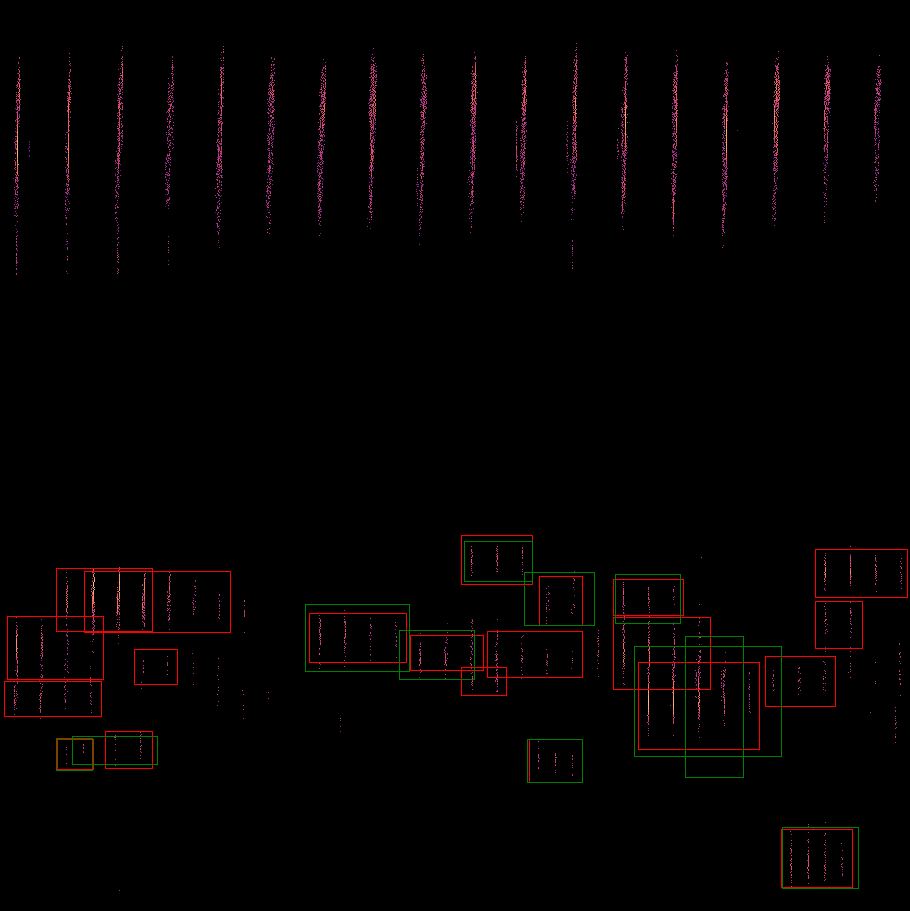

In [28]:
img